# 1. Calculate COVID-19 data trends for last week of the data. Are the cases increasing, decreasing, or stable? Each student chooses a state to analyze.

Importing Libraries

In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [511]:
#Reading the data
cases = pd.read_csv('covid_confirmed_usafacts.csv')

In [512]:
cases.head(5)

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-01-27,2023-01-28,2023-01-29,2023-01-30,2023-01-31,2023-02-01,2023-02-02,2023-02-03,2023-02-04,2023-02-05
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19471,19471,19471,19471,19471,19471,19530,19530,19530,19530
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,68983,68983,68983,68983,68983,68983,69187,69187,69187,69187
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7299,7299,7299,7299,7299,7299,7339,7339,7339,7339
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,7919,7919,7919,7919,7919,7919,7967,7967,7967,7967


In [513]:
cases.drop(['countyFIPS', 'County Name', 'StateFIPS'], axis=1, inplace=True)

In [514]:
cases_data = cases.set_index('State')

# Stack the data from columns to index to get a better view.
cases_to_long = cases_data.stack().reset_index()

# Renaming the columns to get a better view of the data.
cases_to_long.columns = ['state', 'date', 'cases']
print(cases_to_long)

        state        date  cases
0          AL  2020-01-22      0
1          AL  2020-01-23      0
2          AL  2020-01-24      0
3          AL  2020-01-25      0
4          AL  2020-01-26      0
...       ...         ...    ...
3547418    WY  2023-02-01   1885
3547419    WY  2023-02-02   1880
3547420    WY  2023-02-03   1880
3547421    WY  2023-02-04   1880
3547422    WY  2023-02-05   1880

[3547423 rows x 3 columns]


In [529]:
#Choosing a state to analyze
state_cases_df = cases_to_long[cases_to_long['state']=='NC']
state_cases_df

,state,date,cases
2136453,NC,2020-01-22,0
2136454,NC,2020-01-23,0
2136455,NC,2020-01-24,0
2136456,NC,2020-01-25,0
2136457,NC,2020-01-26,0
...,...,...,...
2248659,NC,2023-02-01,6288
2248660,NC,2023-02-02,6300
2248661,NC,2023-02-03,6300
2248662,NC,2023-02-04,6300


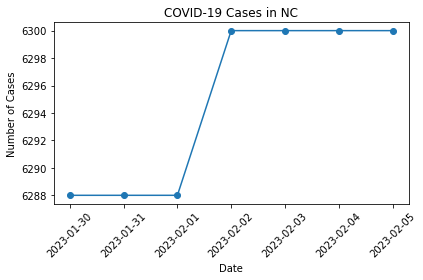

In [516]:
today = state_cases_df["date"].values[-1]
start_date = state_cases_df[state_cases_df["date"] == today].index[-1] - 6

dates = []
cases = []

for i in range(start_date, start_date + 7):
    date = state_cases_df.at[i, "date"]
    case = state_cases_df.at[i, "cases"]
    dates.append(date)
    cases.append(case)

#plotting the data
plt.plot(dates, cases, '-o')
plt.title("COVID-19 Cases in " + state_cases_df["state"].values[0])
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As we can see from the trend, the cases have slightly increased in the last week.

# 2 Each student member creates notebooks to read the Enrichment data and displays them on a notebook.

Reading the ACS Demographics and Housing Data 

In [517]:
demographics_data = pd.read_csv(r"ACSDP5Y2021.DP05-Data.csv", low_memory=False)
demographics_data.head(5)

,GEO_ID,NAME,DP05_0001E,DP05_0001EA,DP05_0001M,DP05_0001MA,DP05_0002E,DP05_0002M,DP05_0002MA,DP05_0002EA,...,DP05_0087PEA,DP05_0088PE,DP05_0088PM,DP05_0088PMA,DP05_0088PEA,DP05_0089PE,DP05_0089PM,DP05_0089PMA,DP05_0089PEA,Unnamed: 714
0,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Annotation of Estimate!!SEX AND AGE!!Total pop...,Margin of Error!!SEX AND AGE!!Total population,Annotation of Margin of Error!!SEX AND AGE!!To...,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Annotation of Margin of Error!!SEX AND AGE!!To...,Annotation of Estimate!!SEX AND AGE!!Total pop...,...,"Annotation of Percent!!CITIZEN, VOTING AGE POP...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",Annotation of Percent Margin of Error!!CITIZEN...,"Annotation of Percent!!CITIZEN, VOTING AGE POP...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",Annotation of Percent Margin of Error!!CITIZEN...,"Annotation of Percent!!CITIZEN, VOTING AGE POP...",NaN
1,0500000US01001,"Autauga County, Alabama",58239,NaN,*****,*****,28206,213,NaN,NaN,...,NaN,47.9,0.3,NaN,NaN,52.1,0.3,NaN,NaN,NaN
2,0500000US01003,"Baldwin County, Alabama",227131,NaN,*****,*****,110781,196,NaN,NaN,...,NaN,48.0,0.1,NaN,NaN,52.0,0.1,NaN,NaN,NaN
3,0500000US01005,"Barbour County, Alabama",25259,NaN,*****,*****,13361,63,NaN,NaN,...,NaN,53.9,0.4,NaN,NaN,46.1,0.4,NaN,NaN,NaN
4,0500000US01007,"Bibb County, Alabama",22412,NaN,*****,*****,12300,150,NaN,NaN,...,NaN,54.8,0.4,NaN,NaN,45.2,0.4,NaN,NaN,NaN


In [518]:
demographics_data.columns = demographics_data.iloc[0]
demographics_data = demographics_data.reindex(demographics_data.index.drop(0))
demographics_data.columns = demographics_data.columns.astype(str)

In [519]:
# Dropping all the Margin of Error and Percent Error columns because they are empty. 
demographics_data.drop(columns=[col for col in demographics_data.columns if 'Annotation' in col], inplace=True)
demographics_data.drop(columns=[col for col in demographics_data.columns if 'Margin' in col], inplace=True)
demographics_data.drop(columns=[col for col in demographics_data.columns if 'Percent' in col], inplace=True)
demographics_data.drop(columns=[col for col in demographics_data.columns if 'nan' in col], inplace=True)

In [520]:
demographics_data.dtypes

0
Geography                                                                                                                                                           object
Geographic Area Name                                                                                                                                                object
Estimate!!SEX AND AGE!!Total population                                                                                                                             object
Estimate!!SEX AND AGE!!Total population!!Male                                                                                                                       object
Estimate!!SEX AND AGE!!Total population!!Female                                                                                                                     object
                                                                                                                                               

In [521]:
# Renaming Columns names to be able to merge with the Covid Data
demographics_data.rename(columns={'Geography': 'countyFIPS', 'Geographic Area Name': 'County Name'}, inplace=True)

In [522]:
# Modifying the string and converting it into an integer
demographics_data['countyFIPS'] = demographics_data['countyFIPS'].str.replace('0500000US', '').astype(int)

In [523]:
demographics_data

,countyFIPS,County Name,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Estimate!!SEX AND AGE!!Total population!!Under 5 years,Estimate!!SEX AND AGE!!Total population!!5 to 9 years,Estimate!!SEX AND AGE!!Total population!!10 to 14 years,Estimate!!SEX AND AGE!!Total population!!15 to 19 years,...,Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone,Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone,Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone,Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races,Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,"Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races",Estimate!!Total housing units,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female"
1,1001,"Autauga County, Alabama",58239,28206,30033,93.9,3318,3716,4004,3939,...,647,0,109,1575,377,1198,24170,43906,21018,22888
2,1003,"Baldwin County, Alabama",227131,110781,116350,95.2,12035,11730,16407,13801,...,2175,9,959,4981,614,4367,121763,174686,83847,90839
3,1005,"Barbour County, Alabama",25259,13361,11898,112.3,1320,1601,1422,1487,...,106,1,229,474,92,382,11667,19623,10571,9052
4,1007,"Bibb County, Alabama",22412,12300,10112,121.6,1196,1274,1230,1463,...,46,0,18,192,22,170,9013,17682,9690,7992
5,1009,"Blount County, Alabama",58884,29530,29354,100.6,3467,3578,4194,3591,...,216,74,92,1479,466,1013,24527,43633,21535,22098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,72145,"Vega Baja Municipio, Puerto Rico",54544,26057,28487,91.5,2192,2611,3113,3440,...,0,0,132,0,0,0,24695,44370,20815,23555
3218,72147,"Vieques Municipio, Puerto Rico",8317,4239,4078,103.9,401,391,379,590,...,0,0,0,97,97,0,4967,6734,3378,3356
3219,72149,"Villalba Municipio, Puerto Rico",22341,10796,11545,93.5,1002,1363,1271,1549,...,0,0,9,0,0,0,9380,17807,8466,9341
3220,72151,"Yabucoa Municipio, Puerto Rico",31047,15000,16047,93.5,1092,1457,1816,1950,...,11,0,0,0,0,0,14548,25441,12091,13350


In [524]:
demographics_data['County Name'] = demographics_data['County Name'].apply(lambda x: x.split(',')[0].strip())
demographics_data["County Name"] = demographics_data["County Name"].str.lower()

In [525]:
covid_superdata = pd.read_csv("covid19_superdata.csv")

In [526]:
covid_superdata

,countyFIPS,County Name,State,StateFIPS,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2023-01-28_y,2023-01-29_y,2023-01-30_y,2023-01-31_y,2023-02-01_y,2023-02-02_y,2023-02-03_y,2023-02-04_y,2023-02-05_y,population
0,0,statewide unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,autauga county,AL,1,0,0,0,0,0,0,...,230,230,230,230,230,230,230,230,230,55869
2,1003,baldwin county,AL,1,0,0,0,0,0,0,...,723,723,723,723,723,723,723,723,723,223234
3,1005,barbour county,AL,1,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,24686
4,1007,bibb county,AL,1,0,0,0,0,0,0,...,109,109,109,109,109,109,109,109,109,22394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,56037,sweetwater county,WY,56,0,0,0,0,0,0,...,137,137,137,137,137,137,137,137,137,42343
3185,56039,teton county,WY,56,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,23464
3186,56041,uinta county,WY,56,0,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,20226
3187,56043,washakie county,WY,56,0,0,0,0,0,0,...,47,47,47,47,47,47,47,47,47,7805


# 3.Each student member performs initial merges with the COVID-19 data using the variables in the Enrichment data.

In [527]:
covid_superdata_demographics = pd.merge(covid_superdata, demographics_data, on=["countyFIPS", "County Name"], how="inner")

In [528]:
covid_superdata_demographics # Data after merging

,countyFIPS,County Name,State,StateFIPS,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone,Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone,Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone,Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races,Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,"Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races",Estimate!!Total housing units,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female"
0,1001,autauga county,AL,1,0,0,0,0,0,0,...,647,0,109,1575,377,1198,24170,43906,21018,22888
1,1003,baldwin county,AL,1,0,0,0,0,0,0,...,2175,9,959,4981,614,4367,121763,174686,83847,90839
2,1005,barbour county,AL,1,0,0,0,0,0,0,...,106,1,229,474,92,382,11667,19623,10571,9052
3,1007,bibb county,AL,1,0,0,0,0,0,0,...,46,0,18,192,22,170,9013,17682,9690,7992
4,1009,blount county,AL,1,0,0,0,0,0,0,...,216,74,92,1479,466,1013,24527,43633,21535,22098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,56037,sweetwater county,WY,56,0,0,0,0,0,0,...,448,14,160,828,271,557,19174,30055,15515,14540
3132,56039,teton county,WY,56,0,0,0,0,0,0,...,369,15,154,463,207,256,13255,17273,9135,8138
3133,56041,uinta county,WY,56,0,0,0,0,0,0,...,37,0,0,571,58,513,8819,14203,7206,6997
3134,56043,washakie county,WY,56,0,0,0,0,0,0,...,31,0,32,207,16,191,3842,5993,3013,2980
